# 01 - Analyse Exploratoire des Données (EDA)

Ce notebook inspecte la structure du jeu de données, calcule des statistiques descriptives et affiche des visualisations principales.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Add src to path
base_dir = Path('../')
sys.path.append(str(base_dir / 'src'))

## 1. Load the Data

In [33]:
# Load the dataset
data_path = Path('../data/medical_insurance.csv')
df = pd.read_csv(data_path)

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (100000, 54)

First few rows:
   person_id  age     sex   region urban_rural   income     education  \
0      75722   52  Female    North    Suburban  22700.0     Doctorate   
1      80185   79  Female    North       Urban  12800.0         No HS   
2      19865   68    Male    North       Rural  40700.0            HS   
3      76700   15    Male    North    Suburban  15600.0  Some College   
4      92992   53    Male  Central    Suburban  89600.0     Doctorate   

  marital_status employment_status  household_size  ...  liver_disease  \
0        Married           Retired               3  ...              0   
1        Married          Employed               3  ...              0   
2        Married           Retired               5  ...              0   
3        Married     Self-employed               5  ...              0   
4        Married     Self-employed               2  ...              0   

   arthritis mental_health proc_imaging_count  proc_surgery_count  \
0 

## 2. Dataset Overview

In [34]:
# Data types and missing values
print("Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  ob

## 3. Statistical Summary

In [35]:
# Statistical summary
print("Statistical Summary:")
print(df.describe().T)

Statistical Summary:
                                count          mean           std      min  \
person_id                    100000.0  50000.500000  28867.657797     1.00   
age                          100000.0     47.521500     15.988752     0.00   
income                       100000.0  49873.905000  46800.214127  1100.00   
household_size               100000.0      2.430900      1.075126     1.00   
dependents                   100000.0      0.898380      0.950654     0.00   
bmi                          100000.0     26.990512      4.994883    12.00   
visits_last_year             100000.0      1.927650      1.737730     0.00   
hospitalizations_last_3yrs   100000.0      0.093640      0.304848     0.00   
days_hospitalized_last_3yrs  100000.0      0.373350      1.373011     0.00   
medication_count             100000.0      1.236320      1.209358     0.00   
systolic_bp                  100000.0    117.808970     15.369187    61.00   
diastolic_bp                 100000.0     7

## 4. Target Variable Distribution

Target column: annual_medical_cost


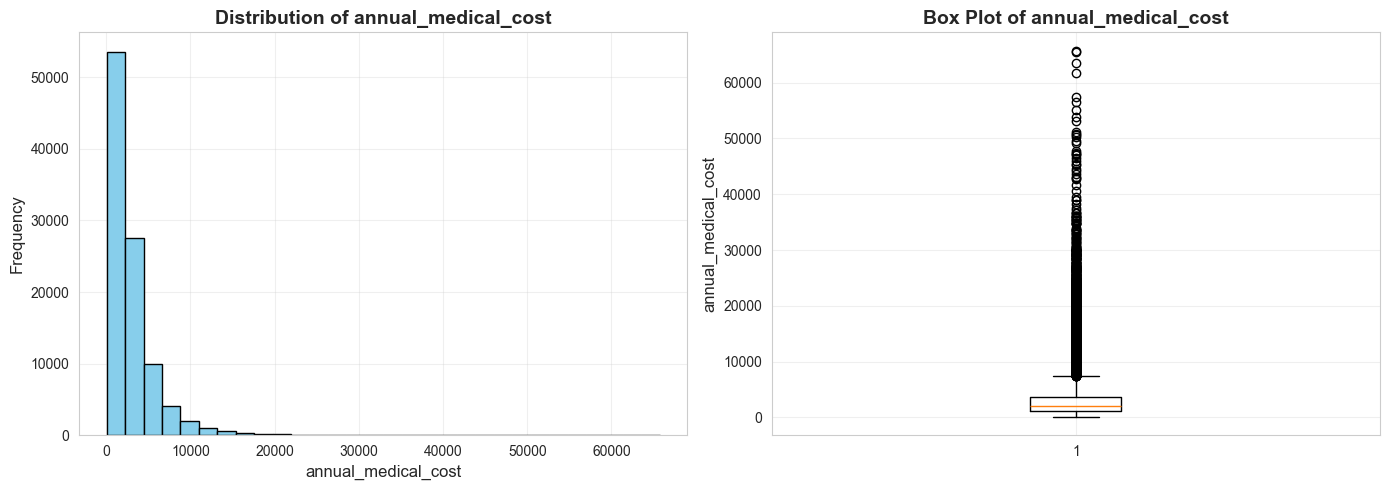


annual_medical_cost Statistics:
Mean: 3009.45
Median: 2082.57
Std: 3127.46
Min: 55.55
Max: 65724.90
Skewness: 4.03


In [36]:
# Identify target column
target_col = 'annual_medical_cost' if 'annual_medical_cost' in df.columns else 'charges'
print(f"Target column: {target_col}")

# Plot target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[target_col], bins=30, edgecolor='black', color='skyblue')
axes[0].set_xlabel(target_col, fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(f'Distribution of {target_col}', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df[target_col])
axes[1].set_ylabel(target_col, fontsize=12)
axes[1].set_title(f'Box Plot of {target_col}', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n{target_col} Statistics:")
print(f"Mean: {df[target_col].mean():.2f}")
print(f"Median: {df[target_col].median():.2f}")
print(f"Std: {df[target_col].std():.2f}")
print(f"Min: {df[target_col].min():.2f}")
print(f"Max: {df[target_col].max():.2f}")
print(f"Skewness: {df[target_col].skew():.2f}")

## 5. Numerical Features Analysis

Numerical features (43): ['person_id', 'age', 'income', 'household_size', 'dependents', 'bmi', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'had_major_procedure']


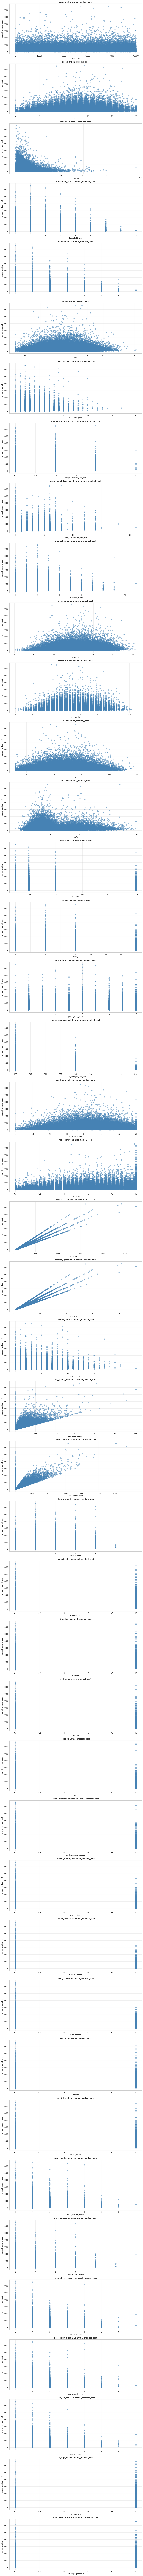

In [37]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")

# Plot scatter plots for numerical features vs target
n_cols = len(numerical_cols)
fig, axes = plt.subplots(max(1, n_cols), 1, figsize=(12, 5*max(1, n_cols)))
if n_cols == 1:
    axes = [axes]

for idx, col in enumerate(numerical_cols):
    axes[idx].scatter(df[col], df[target_col], alpha=0.5, color='steelblue')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel(target_col, fontsize=11)
    axes[idx].set_title(f'{col} vs {target_col}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Categorical Features Analysis

In [38]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")
print(f"\nValue counts for categorical features:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

Categorical features (10): ['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier']

Value counts for categorical features:

sex:
sex
Female    49193
Male      48794
Other      2013
Name: count, dtype: int64
Unique values: 3

region:
region
South      28029
North      22027
East       19984
West       17879
Central    12081
Name: count, dtype: int64
Unique values: 5

urban_rural:
urban_rural
Urban       60019
Suburban    25021
Rural       14960
Name: count, dtype: int64
Unique values: 3

education:
education
Bachelors       27996
Some College    25112
HS              24827
Masters         13987
No HS            5120
Doctorate        2958
Name: count, dtype: int64
Unique values: 6

marital_status:
marital_status
Married     53252
Single      35715
Divorced     6984
Widowed      4049
Name: count, dtype: int64
Unique values: 4

employment_status:
employment_status
Employed         55269
Retired          198

## 7. Categorical vs Target Relationship

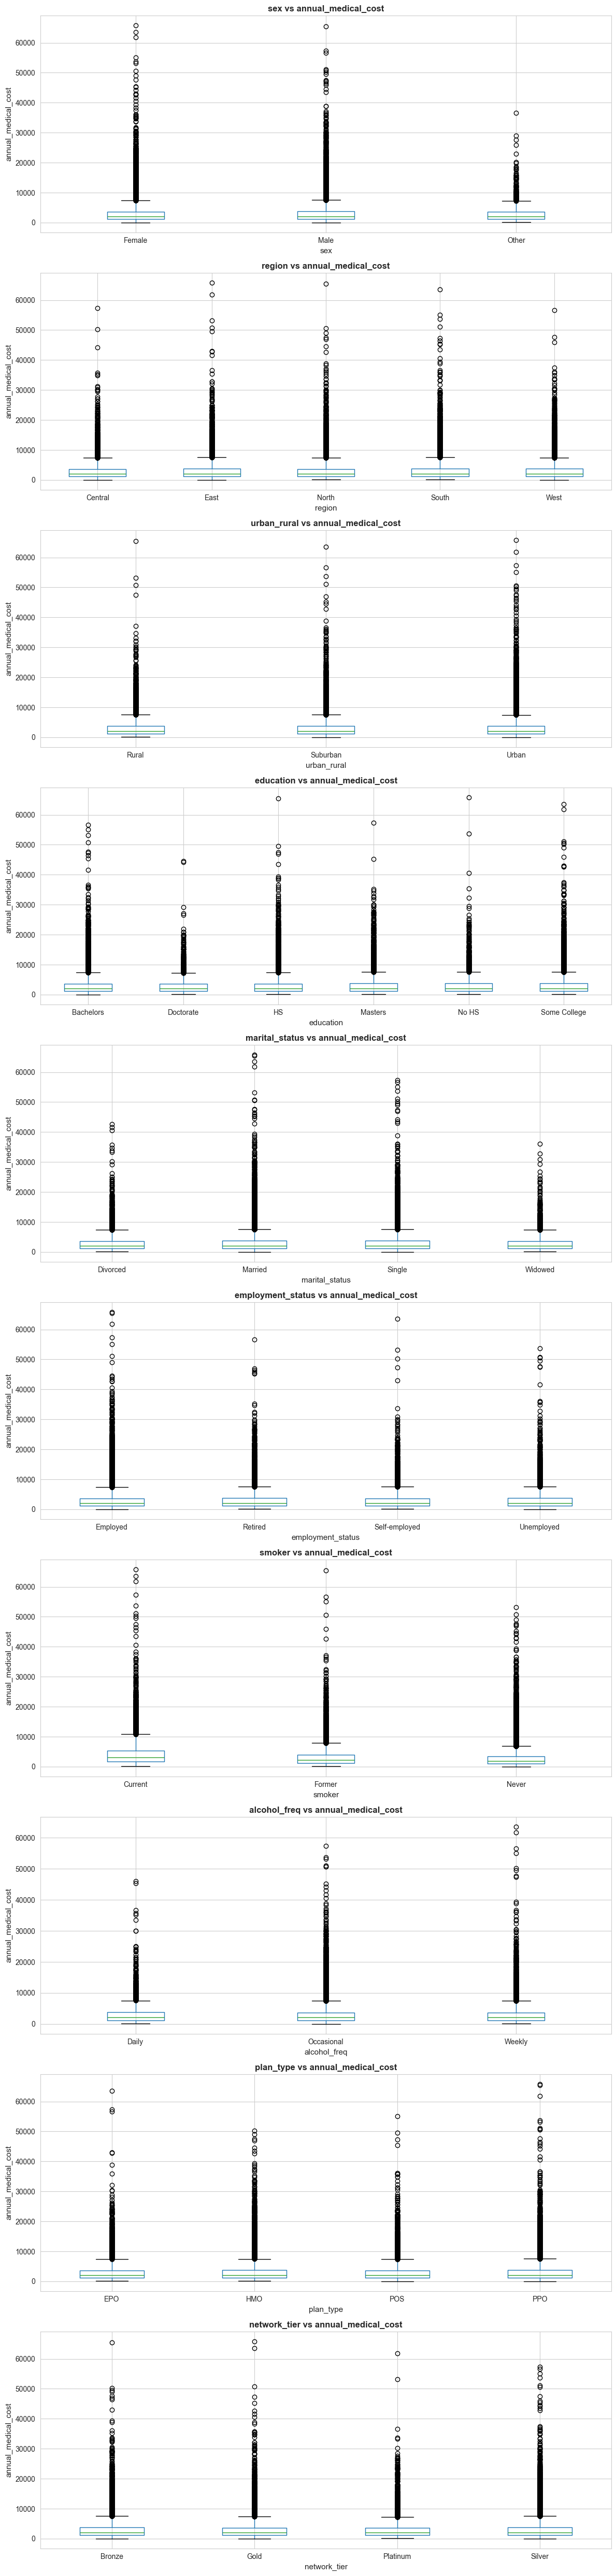

In [39]:
# Plot categorical features vs target
n_cat = len(categorical_cols)
fig, axes = plt.subplots(max(1, n_cat), 1, figsize=(12, 5*max(1, n_cat)))
if n_cat == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    df.boxplot(column=target_col, by=col, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {target_col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel(target_col, fontsize=11)

plt.suptitle('')  # Remove the automatic title
plt.tight_layout()
plt.show()

## 8. Correlation Analysis

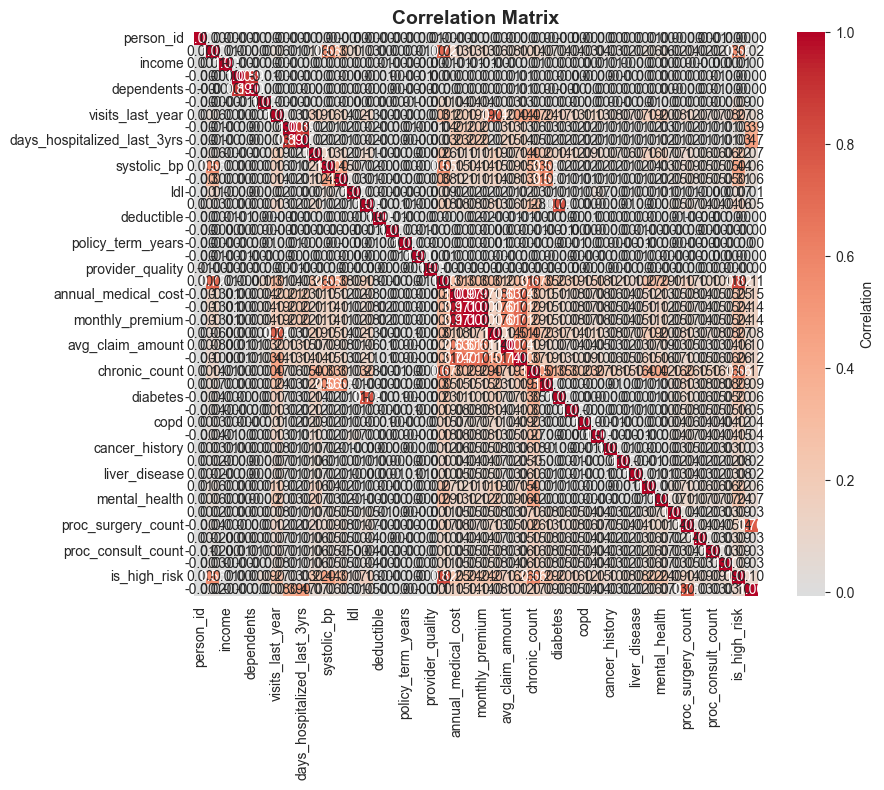


Correlation with annual_medical_cost:
annual_medical_cost            1.000000
monthly_premium                0.965416
annual_premium                 0.965415
total_claims_paid              0.739402
avg_claim_amount               0.632996
risk_score                     0.305971
chronic_count                  0.296720
is_high_risk                   0.251923
days_hospitalized_last_3yrs    0.230246
hospitalizations_last_3yrs     0.208640
visits_last_year               0.195631
claims_count                   0.179082
hypertension                   0.154309
had_major_procedure            0.148292
systolic_bp                    0.145070
age                            0.131166
mental_health                  0.126232
diastolic_bp                   0.117647
arthritis                      0.115375
medication_count               0.113456
diabetes                       0.107373
hba1c                          0.083416
asthma                         0.080830
cardiovascular_disease         0.078515
p

In [40]:
# Correlation matrix for numerical features
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            cbar_kws={'label': 'Correlation'}, square=True)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Show correlations with target
print(f"\nCorrelation with {target_col}:")
target_corr = correlation_matrix[target_col].sort_values(ascending=False)
print(target_corr)

## 9. Key Insights & Summary

In [41]:
print("\n" + "="*60)
print("EDA SUMMARY")
print("="*60)
print(f"\nDataset Shape: {df.shape[0]} samples, {df.shape[1]} features")
print(f"Missing Values: {df.isnull().sum().sum()} (No missing values)" if df.isnull().sum().sum() == 0 else f"Missing Values: {df.isnull().sum().sum()}")
print(f"\nNumerical Features ({len(numerical_cols)}): {', '.join(numerical_cols)}")
print(f"Categorical Features ({len(categorical_cols)}): {', '.join(categorical_cols)}")
print(f"\nTarget Variable: {target_col}")
print(f"Target Type: {df[target_col].dtype}")
print(f"Target Range: [{df[target_col].min():.2f}, {df[target_col].max():.2f}]")
print(f"Target Mean: {df[target_col].mean():.2f}")
print(f"Target Std: {df[target_col].std():.2f}")
print("\nNext steps: Proceed to data preparation notebook")
print("="*60)


EDA SUMMARY

Dataset Shape: 100000 samples, 54 features
Missing Values: 30083

Numerical Features (43): person_id, age, income, household_size, dependents, bmi, visits_last_year, hospitalizations_last_3yrs, days_hospitalized_last_3yrs, medication_count, systolic_bp, diastolic_bp, ldl, hba1c, deductible, copay, policy_term_years, policy_changes_last_2yrs, provider_quality, risk_score, annual_premium, monthly_premium, claims_count, avg_claim_amount, total_claims_paid, chronic_count, hypertension, diabetes, asthma, copd, cardiovascular_disease, cancer_history, kidney_disease, liver_disease, arthritis, mental_health, proc_imaging_count, proc_surgery_count, proc_physio_count, proc_consult_count, proc_lab_count, is_high_risk, had_major_procedure
Categorical Features (10): sex, region, urban_rural, education, marital_status, employment_status, smoker, alcohol_freq, plan_type, network_tier

Target Variable: annual_medical_cost
Target Type: float64
Target Range: [55.55, 65724.90]
Target Mean: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

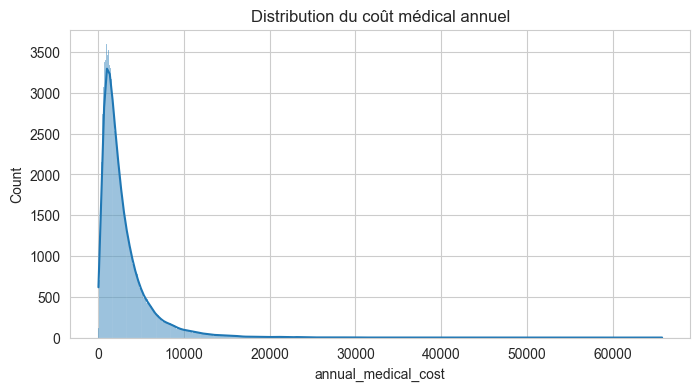

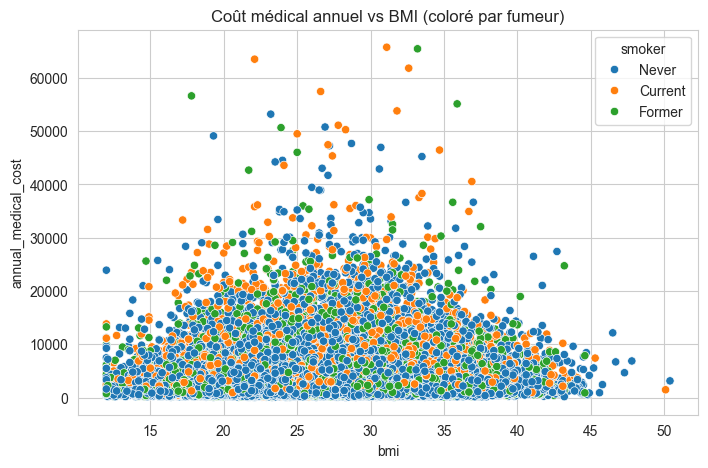

In [42]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('../data/medical_insurance.csv')
df.head()
# Informations générales et statistiques
df.info()
df.describe(include='all')
df.isna().sum()

# Visualisations principales
plt.figure(figsize=(8,4))
sns.histplot(df['annual_medical_cost'], kde=True)
plt.title('Distribution du coût médical annuel')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='annual_medical_cost', hue=df['smoker'].astype(str), data=df)
plt.title('Coût médical annuel vs BMI (coloré par fumeur)')
plt.show()
